# DSP - Aufgabenblatt 2
#### FHNW - HS2019

### Aufgabe 1

Implementieren Sie eine Klasse für ein Rechteck parallel zu den Koordinatenachsen, welches mit zwei Punkten initialisiert werden kann.  

Fügen Sie der Klasse dann eine Methode hinzu, welche für einen weiteren Punkt zurückgibt, ob der Punkt innerhalb des Rechtecks liegt oder nicht.  

Eine weitere Methode soll die Fläche des Rechtecks berechnen.  

Zeigen Sie, dass ihre Klasse wie zu erwarten funktioniert.

In [1]:
class Rectangle():
    
    def __init__(self, point1, point2):
        '''A Rectangle defined by two points.
        '''
        self.xmin = min(point1[0], point2[0])
        self.xmax = max(point1[0], point2[0])
        self.ymin = min(point1[1], point2[1])
        self.ymax = max(point1[1], point2[1])
        
    def __contains__(self, p):
        return p[0]>=self.xmin and p[0]<=self.xmax and p[1]>=self.ymin and p[1]<=self.ymax
    
    @property
    def area(self):
        return (self.xmax-self.xmin)*(self.ymax-self.ymin)

In [2]:
r = Rectangle((0,0), (4, 4))
(1,1) in r

True

In [3]:
r.area

16

### Aufgabe 2

Ergänzen Sie die Folgende Klasse für einen Vektor in zwei Dimensionen um Methoden, welche

1. Vektoraddition, Subtraktion und Multplikation mit einem Skalar berechnet, unter Verwendung der Operatoren `+, -, *`.
2. Die Koordinaten des Vektors in [Polarkoordinaten](https://de.wikipedia.org/wiki/Polarkoordinaten) zurückgibt
3. eine Rotation des Vektors um den Ursprung ausführt.
4. die Länge des Vektors als Resultat der Funktion `len` zurückgibt.

Durch aufrufen der Methode `plot`, können Sie den Vektor zeichnen.  

Zeigen Sie, dass ihr Klasse wie zu erwarten funktioniert.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

In [7]:
from math import sqrt, atan, sin, cos, pi

class Vector():
    '''
    '''
    
    def __init__(self, x1, x2):
        '''A Vector in 2D that extends from x1 to x2.
        
        Arguments
        ---------
        x1 : Tuple of two numerical values
        x2 : Tuple of two numerical values
        
        '''
        self.x1 = x1
        self.x2 = x2
    
    @property
    def dir_vec(self):
        return (self.x2[0]-self.x1[0], self.x2[1]-self.x1[0])
            
    def plot(self, color='r'):
        '''Draws the vector into a coordinate system.
        
        You can provide an axes to plot into and specify
        the color of the vector line.
        '''
        fig, ax = plt.subplots(figsize = (5,5))
        ax.axvline(x=0, color='k', linestyle='--')
        ax.axhline(y=0, color='k', linestyle='--')
        #ax.plot([self.x1[0], self.x2[0]],[self.x1[1],self.x2[1]], c=color, lw=3)
        ax.arrow(self.x1[0], self.x1[1], self.x2[0], self.x2[1], head_width=.3,
        head_length=.6, fc='r', ec='r', lw=3)
        lim = max(abs(self.x1[0]), abs(self.x2[0]), abs(self.x1[1]), abs(self.x2[1]),)
        lims = (-lim-2*lim*0.5, lim+2*lim*0.5)
        ax.set_xlim(*lims)
        ax.set_ylim(*lims)
        return fig, ax
    
    def __add__(self, v):
        if type(v) != Vector:
            raise ValueError('You can only add a Vector to a Vector.')
        return Vector(self.x1, (self.x2[0]+v.x2[0]-v.x1[0], self.x2[1]+v.x2[1]-v.x2[1]))

    def __len__(self):
        '''
        !! this does not make a lot of sense, since `len()` is required to return an integer.
        -> also, it's intended to be used as an indicator for the number of elements in a sequence ..
        '''
        return int(self.length)
      
    def __mul__(self, k):
        vec = self.dir_vec
        uv = (vec[0]/self.length, vec[1]/self.length)
        x20 = self.x1[0]+uv[0]*k*self.length
        x21 = self.x1[1]+uv[1]*k*self.length
        self.x2 = (x20, x21)
        
    @staticmethod
    def norm(v):
        '''Calculates the 2-norm of a 2d vector.
        '''
        return sqrt((v[0])**2 + (v[1])**2)
    
    @property
    def length(self):
        '''Returns the 2-norm of the objects vector.
        '''
        return self.norm((self.x2[0]-self.x1[0], self.x2[1]-self.x1[1]))
    
    @property
    def polar_coords(self):
        '''Returns starting and end point of the objects vector in polar coordinates.
        '''
        return self.cartesian_to_polar(self.x1), self.cartesian_to_polar(self.x2)
    
    @staticmethod
    def cartesian_to_polar(v):
        ''' '''
        r = Vector.norm(v)
        if r != 0:
            try:
                gamma = atan(v[1]/v[0])
                # we have to cover the quadrants of the plane separately
                if v[0] < 0 and v[1] > 0:
                    gamma += pi
                if v[0] < 0 and v[1] < 0:
                    gamma += pi
                if v[0] > 0 and v[1] < 0:
                    gamma += 2*pi
            except ZeroDivisionError:
                if v[1] > 0:
                    gamma = pi/2
                else:
                    gamma = 3*pi/3
            return r, gamma
        else:
            return 0, 0
    
    @staticmethod
    def polar_to_cartesian(v):
        ''' '''
        x = cos(v[1])*v[0]
        y = sin(v[1])*v[0]
        return x, y
    
    def rotate(self, alpha):
        ''' '''
        x1_, x2_ = self.polar_coords
        if x1_[0] != 0:
            x1__ = (x1_[0], x1_[1]+alpha)
        else:
            x1__ = x1_
        if x2_[0] != 0:
            x2__ = (x2_[0], x2_[1]+alpha)
        else:
            x2__ = x2_
        self.x1 = self.polar_to_cartesian(x1__)
        self.x2 = self.polar_to_cartesian(x2__)

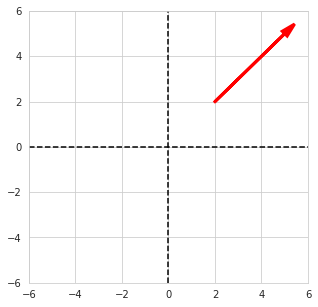

In [8]:
v = Vector((2, 2), (3, 3))
fig, ax = v.plot()

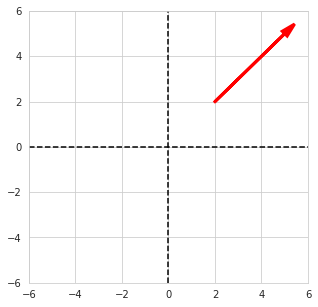

In [9]:
x1_, x2_ = v.polar_coords
v2 = Vector(Vector.polar_to_cartesian(x1_), Vector.polar_to_cartesian(x2_))
fig, ax = v2.plot()

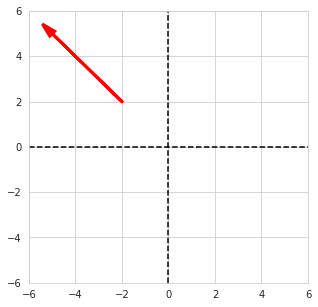

In [10]:
v.rotate(pi/2)
fig, ax = v.plot()

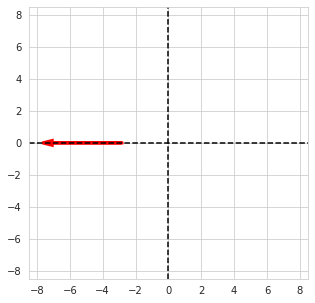

In [11]:
v.rotate(pi/4)
fig, ax = v.plot()

225.0


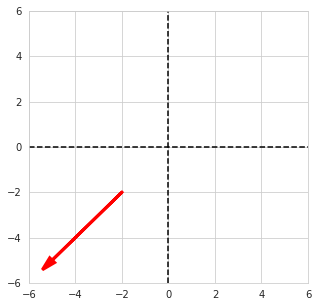

In [12]:
v.rotate(pi/4)
print(v.polar_coords[1][1]/(2*pi)*360)
fig, ax = v.plot()

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efd61d0bfd0>)

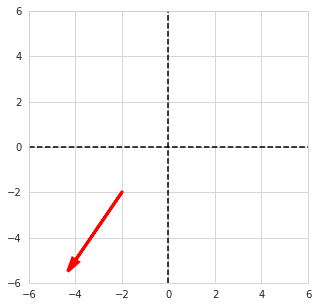

In [13]:
(v + v2).plot()

### Aufgabe 3

Schreiben sie eine *Generator Function* für die [Fibonacci-Folge](https://de.wikipedia.org/wiki/Fibonacci-Folge).  

Geben Sie die ersten 100 Werte aus.  

Vergleichen Sie die Eigenschaften der *Generator Function* mit denjenigen einer Funktion welche eine `list` zurückgibt.  

Überlegen Sie sich was und wie Sie hier *profilen* könnten.  

In [14]:
def fib_gen(num_elements=100):
    '''Computes the Fibonacci series as a generator function.
    '''
    it = 0
    v2 = 0
    v1 = 1
    
    yield v2
    
    while it < num_elements:
        yield v1
        tmp = v2
        v2 = v1
        v1 = tmp+v1
        it += 1
        
        
def fib_list(num_elements=100):
    '''Computes the Fibonacci series as a generator function.
    '''
    fibs = [0, 1,]
    
    while len(fibs) < num_elements:
        fibs.append(fibs[-2]+fibs[-1])
        
    return fibs

In [18]:
def create_list():
    return fib_list(1000)
    
def create_values():
    for f in fib_gen(1000):
        continue

In [16]:
%load_ext memory_profiler

In [19]:
%memit create_values()

peak memory: 136.77 MiB, increment: 0.00 MiB


In [20]:
%memit l = create_list()

peak memory: 136.78 MiB, increment: 0.00 MiB


In [21]:
%timeit create_values()

132 µs ± 4.29 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [22]:
%timeit create_list()

203 µs ± 5.18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Aufgabe 4

Schreiben sie eine *Generator Function* welche eine Datei öffnet, Zeile für Zeile durch die Datei hindurchschreitet, eine Operation auf der Zeile ausführt und das Resultat zurückgibt.  

Beispiel: Sie öffnen *Shakespeare's* gesammelte Werke von `data/dsp/all-shakespeare.txt` und geben für jede Zeile auf welcher 'Romeo' steht Zeilenzahl und Anzahl Nennungen zurück. Sie könnten, die Funktion auch so schreiben, dass sie ein beliebiges Wort suchen können.

In [23]:
ls /data/

ab_data.csv*
all-shakespeare.txt
aravg.mon.land_ocean.90S.90N.v4.0.1.201809.asc
Auto.csv
avisec/
california_cities.csv
co2_weekly_mlo.txt
datasets.csv
diamonds.csv
DoctorContacts.csv
elecdemand.csv
FARS.csv
felixriese-hyperspectral-soilmoisture-dataset-657d5d0/
googleTrendsPerlGo.csv
haushaltsstruktur_zuerich.csv
image.gif
iris_data.csv
LCDataDictionary.xlsx
LoanStats3a.csv*
messwerte_tiefenbrunnen_2019.csv
NCBirths2004.csv
readme_temperature_timeseries.timeseries
respiratory.csv
RoboBeam_Dauertest/
Skating2014.csv
titanic_cook_travel_passengers.csv
titanic.csv
titanic_survivors.csv
titanic_victims.csv
T_JB_2017_14_1.xlsx
Untitled.ipynb
zuerich/
zuerich.zip


In [24]:
remove = ['.', '?', ',', '\n', '\t', '!', ';', '-', ':', "'", "]", "[]"]

def count_words_per_line(document='/data/all-shakespeare.txt', word='Romeo'):
    with open(document, 'r') as fid:
        for lineno, line in enumerate(fid):
            # compare lowercase words
            if word.lower() in line.lower():
                # remove 'special characters'
                for c in remove:
                    line = line.replace(c, " ")
                words = [w.lower() for w in line.rsplit()]
                yield lineno, words.count(word.lower())

In [25]:
romeo = list(count_words_per_line())

In [26]:
romeo[:10]

[(132919, 1),
 (132937, 1),
 (132939, 1),
 (132941, 1),
 (132951, 1),
 (132998, 1),
 (133021, 1),
 (133218, 1),
 (133264, 1),
 (133276, 1)]

In [27]:
total = sum([n[1] for n in romeo])

In [28]:
total

340

### Aufgabe 5

Schreiben Sie einen *Decorator* mit Hilfe von [`functools`](https://docs.python.org/3.6/library/functools.html)`.wraps`, welcher es analog zum *Profiling Context Manager* im Skript erlaubt, die Zeit zu messen, welche ein Funktionsaufruf braucht, durch Dekoration mit `@profile`.  

In [29]:
from functools import wraps

In [30]:
from datetime import datetime

def profile(f):    
    @wraps(f)
    def wrapper(*args, **kwargs):
        start = datetime.now()
        result = f(*args, **kwargs)
        dt = datetime.now() - start
        print('Time used: {} s'.format(dt.total_seconds()))
        return result    
    return wrapper

In [33]:
@profile
def fibo(n):
    return list(fib_gen(n))

In [34]:
f = fibo(10000)

Time used: 0.003273 s


In [35]:
f[-1] == f[-2]+f[-3]

True